In [1]:
import numpy as np
import cv2
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets as dts
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [2]:
### Threshold value between 0 and 1
def threshold(img, TH = .1):
    output = np.zeros_like(img)
    output[img > TH] = 1
    return output

def showDigitSamples(samples, filename = ''):
    figure = plt.figure(figsize=(10,5))
    cols, rows = 5, 2
    for i in range(1, cols * rows + 1):
        figure.add_subplot(rows, cols, i)
        plt.title(i-1)
        plt.axis("off")
        plt.imshow(samples[i-1].squeeze(), cmap="gray")

    if not filename == '':
        plt.savefig(filename)
    plt.show()

def mse(A, B):
    return ((A - B) ** 2).mean(axis=None)


In [3]:
training_data = dts.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test_data = dts.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

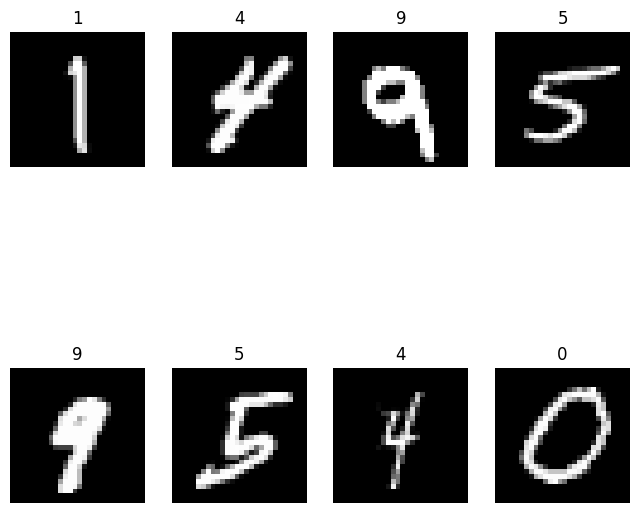

In [5]:
figure = plt.figure(figsize=(8,8))
cols, rows = 4, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [12]:
for i in range(len(training_data)):
    if not i % 1000:
        print(i)
    img, label = training_data[i]
    img = img.numpy()
    img = np.reshape(img, [28, 28])
    img_resize = 255-cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)*255
    img_color = cv2.cvtColor(img_resize, cv2.COLOR_GRAY2BGR)
    # plt.imshow(img_resize.squeeze(), cmap="gray")
    # plt.show()
    # cv2.imwrite('data/MNIST/imgs/'+ str(i) + '_' + str(label) + '.jpg', img_color)

0
data/MNIST/imgs/8/0.jpg
1000
data/MNIST/imgs/6/1000.jpg
2000
data/MNIST/imgs/0/2000.jpg
3000
data/MNIST/imgs/5/3000.jpg
4000
data/MNIST/imgs/6/4000.jpg
5000
data/MNIST/imgs/2/5000.jpg
6000
data/MNIST/imgs/9/6000.jpg
7000
data/MNIST/imgs/9/7000.jpg
8000
data/MNIST/imgs/4/8000.jpg
9000
data/MNIST/imgs/9/9000.jpg
10000
data/MNIST/imgs/7/10000.jpg
11000
data/MNIST/imgs/2/11000.jpg
12000
data/MNIST/imgs/3/12000.jpg
13000
data/MNIST/imgs/9/13000.jpg
14000
data/MNIST/imgs/6/14000.jpg
15000
data/MNIST/imgs/7/15000.jpg
16000
data/MNIST/imgs/1/16000.jpg
17000
data/MNIST/imgs/7/17000.jpg
18000
data/MNIST/imgs/8/18000.jpg
19000
data/MNIST/imgs/4/19000.jpg
20000
data/MNIST/imgs/2/20000.jpg
21000
data/MNIST/imgs/4/21000.jpg
22000
data/MNIST/imgs/4/22000.jpg
23000
data/MNIST/imgs/3/23000.jpg
24000
data/MNIST/imgs/4/24000.jpg
25000
data/MNIST/imgs/9/25000.jpg
26000
data/MNIST/imgs/6/26000.jpg
27000
data/MNIST/imgs/0/27000.jpg
28000
data/MNIST/imgs/8/28000.jpg
29000
data/MNIST/imgs/8/29000.jpg
30000


In [6]:
img_acc = np.zeros(shape=[10, 28, 28], dtype=np.float32)
label_acc = np.zeros(shape=[10, 28, 28], dtype=int)
for i in range(len(training_data)):
    if not i % 1000:
        print(i)
    img, label = training_data[i]
    img = img.numpy()
    img = np.reshape(img, [28, 28])
    img_acc[label] += img
    label_acc[label] += 1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000


In [7]:
img_avg = np.zeros(shape=[10, 28, 28], dtype=np.float32)
print(np.shape(img_avg[0]))
img_avg = np.divide(img_acc, label_acc)

(28, 28)


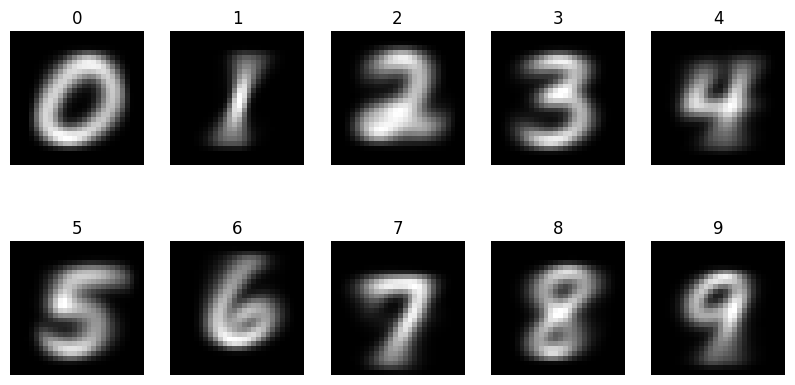

In [8]:
figure = plt.figure(figsize=(10,5))
cols, rows = 5, 2
for i in range(1, cols * rows + 1):
    figure.add_subplot(rows, cols, i)
    plt.title(i-1)
    plt.axis("off")
    plt.imshow(img_avg[i-1].squeeze(), cmap="gray")
plt.show()

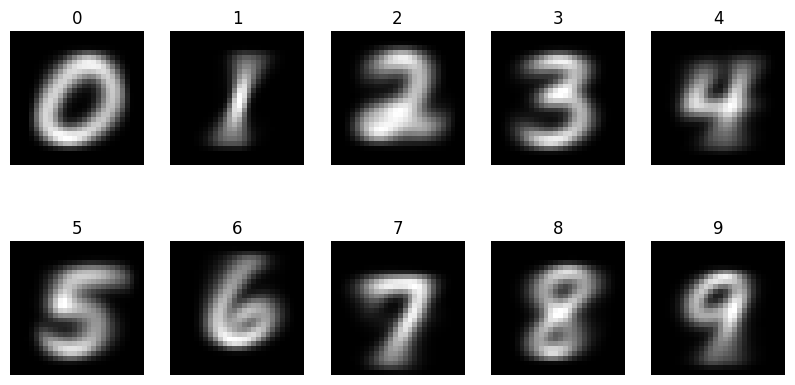

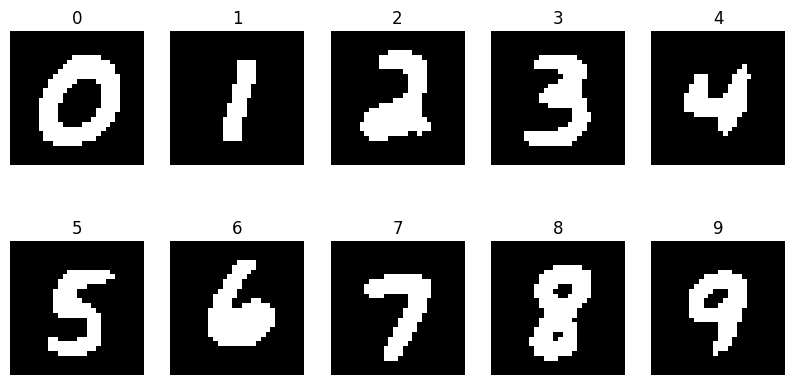

In [9]:
TH = 90/255.
img_avg_resize = np.zeros(shape=[10,28,28], dtype=np.float32)
for i in range(10):
    img_avg_resize[i] = cv2.resize(img_avg[i], [28, 28])

showDigitSamples(img_avg_resize, filename='average.png')

img_thresh = np.zeros_like(img_avg_resize)
for i in range(10):
    img_thresh[i] = threshold(img_avg_resize[i], TH=TH)

showDigitSamples(img_thresh, filename='threshold.png')

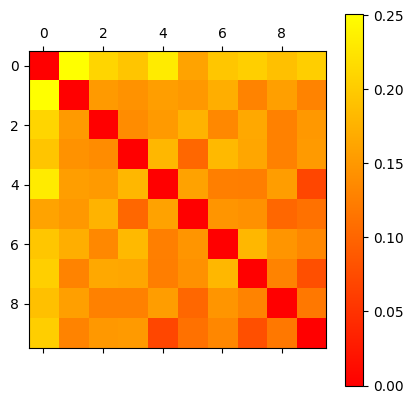

In [10]:
uniqueness = np.zeros(shape=[10,10], dtype=float)

for i in range(10):
    # print(img_thresh[i])
    for j in range(10):
        uniqueness[i][j] = mse(img_thresh[i], img_thresh[j])

plt.matshow(uniqueness, cmap='autumn')
plt.colorbar()
plt.show()

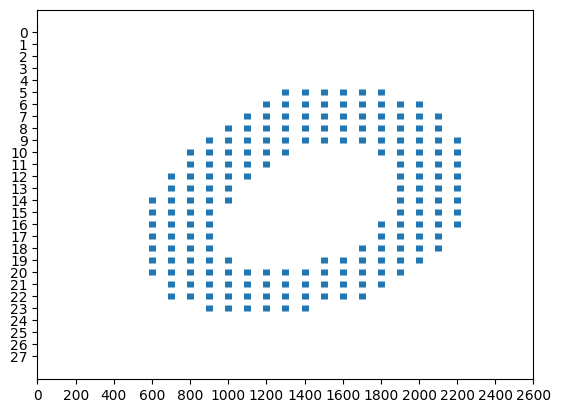

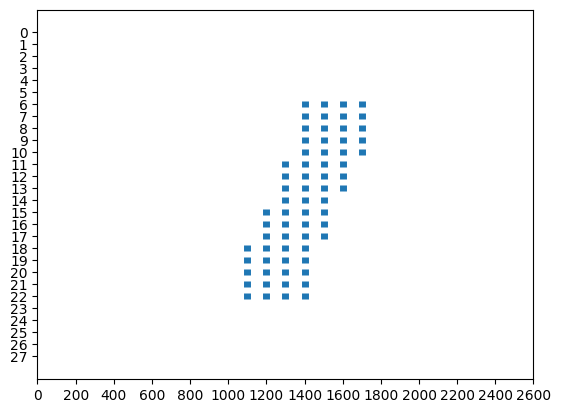

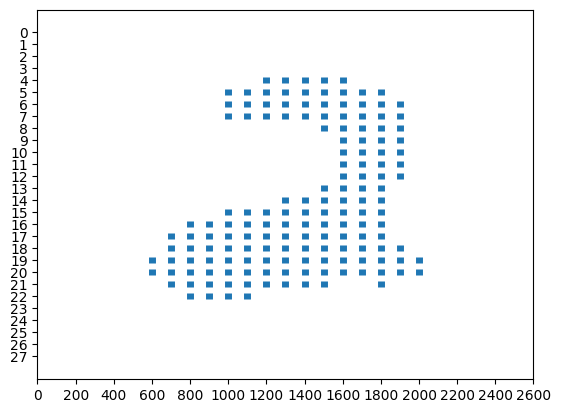

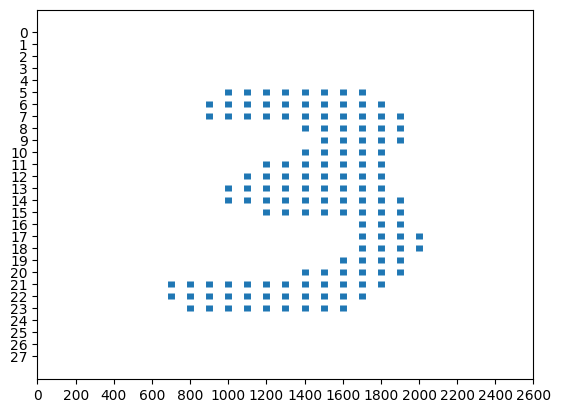

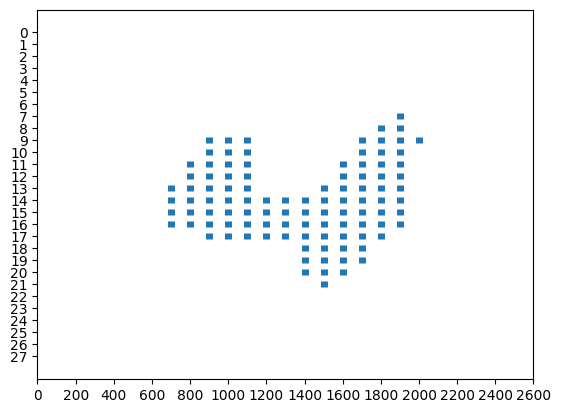

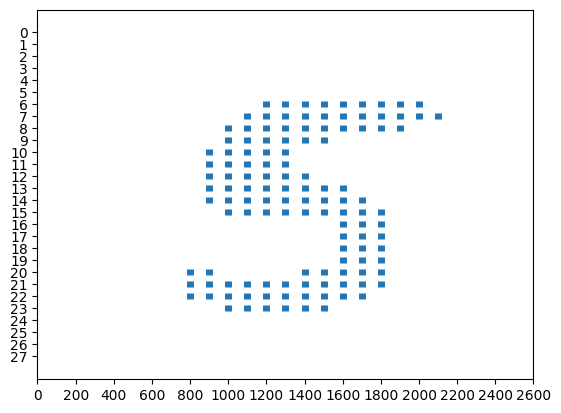

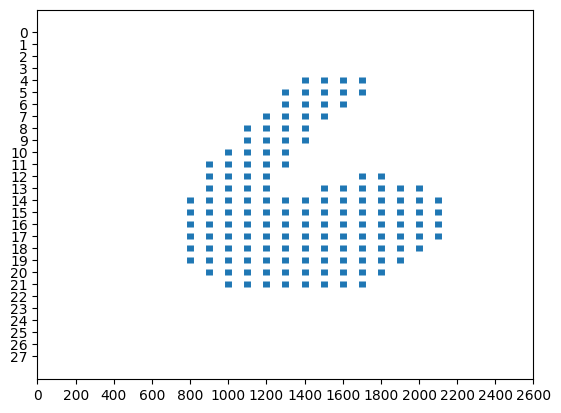

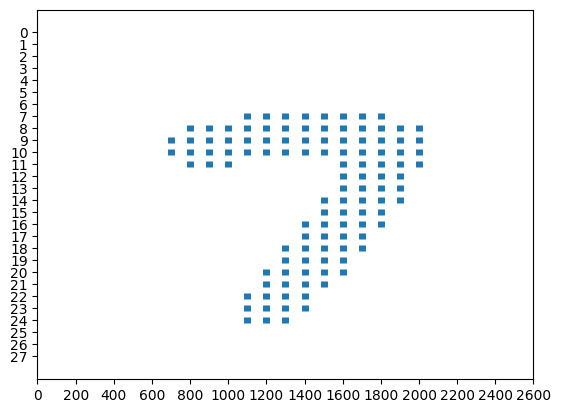

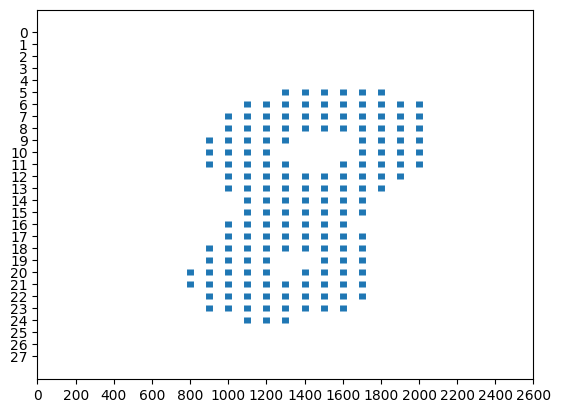

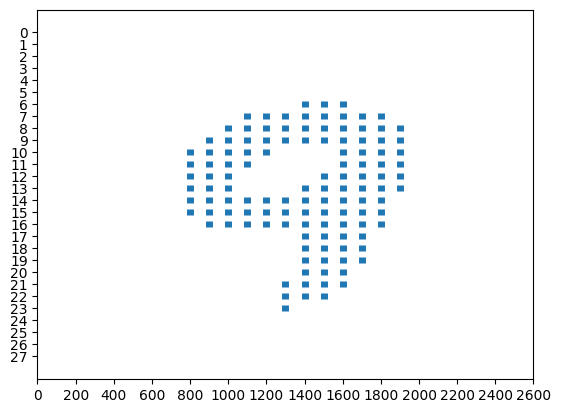

In [11]:
import pickle
# Generate Spikes
time_step = 100
spike_set=[]
for i in range(10):
    sample = img_thresh[i]
    # print(sample)
    spikes = []
    for col in range(np.shape(sample)[0]):
        row_spikes = []
        for row in range(np.shape(sample)[1]):
            if sample[col][row] == 1:
                row_spikes.append(row*time_step)
            else:
                sample[col][row] = 0
        spikes.append(row_spikes)
    # print(spikes)
    spike_set.append(spikes)
    fig, ax = plt.subplots()
    plt.eventplot(spikes, linelengths=.5, linewidths=5)
    ax.invert_yaxis()
    ax.set_yticks(range(28))
    ax.set_xticks([i for i in range(0, 2800, 200)])
    plt.show()

    with open("data/MNIST_spikes" + str(i) + ".bin", "wb") as output:
        pickle.dump(spikes, output)


0
1
2
3

2
3
4
5

4
5
6
7

6
7
8
9

8
9
10
11

10
11
12
13

12
13
14
15

14
15
16
17

16
17
18
19

18
19
20
21

20
21
22
23

22
23
24
25

24
25
26
27

0
1
2
3

2
3
4
5

4
5
6
7

6
7
8
9

8
9
10
11

10
11
12
13

12
13
14
15

14
15
16
17

16
17
18
19

18
19
20
21

20
21
22
23

22
23
24
25

24
25
26
27

0
1
2
3

2
3
4
5

4
5
6
7

6
7
8
9

8
9
10
11

10
11
12
13

12
13
14
15

14
15
16
17

16
17
18
19

18
19
20
21

20
21
22
23

22
23
24
25

24
25
26
27

0
1
2
3

2
3
4
5

4
5
6
7

6
7
8
9

8
9
10
11

10
11
12
13

12
13
14
15

14
15
16
17

16
17
18
19

18
19
20
21

20
21
22
23

22
23
24
25

24
25
26
27

0
1
2
3

2
3
4
5

4
5
6
7

6
7
8
9

8
9
10
11

10
11
12
13

12
13
14
15

14
15
16
17

16
17
18
19

18
19
20
21

20
21
22
23

22
23
24
25

24
25
26
27

0
1
2
3

2
3
4
5

4
5
6
7

6
7
8
9

8
9
10
11

10
11
12
13

12
13
14
15

14
15
16
17

16
17
18
19

18
19
20
21

20
21
22
23

22
23
24
25

24
25
26
27

0
1
2
3

2
3
4
5

4
5
6
7

6
7
8
9

8
9
10
11

10
11
12
13

12
13
14
15

14
15
16
17

16
17
1

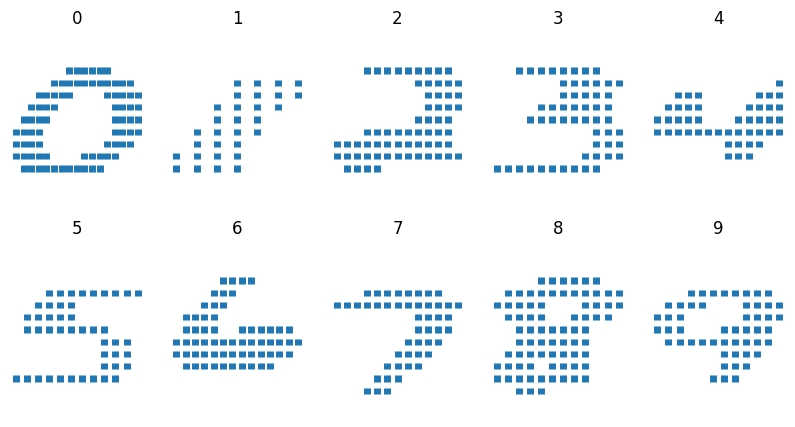

In [13]:
# print(len(spike_set[0]))
th_spike = 3
spike_set_reduced = []
for kdx in range(10):
    avg = []
    for i in range(0, len(spike_set[kdx])-2, 2):
        rowavg = []
        print()
        sublist =[]
        for j in range(i, i+4):
            print(j)
            sublist.append(spike_set[kdx][j])
        for t in range(0, 2800, 100):
            tcount = sum(sublist, []).count(t)
            # print(t, tcount)
            if tcount >= th_spike:
                rowavg.append(t)
        avg.append(rowavg)
    spike_set_reduced.append(avg)
    with open("Reduced Spikeset/MNIST_spikes" + str(kdx) + ".bin", "wb") as output:
        pickle.dump(avg, output)
    # fig, ax = plt.subplots()
    # plt.eventplot(avg, linelengths=.5, linewidths=5)
    # ax.invert_yaxis()
    # ax.set_yticks(range(13))
    # ax.set_xticks([i for i in range(0, 2800, 200)])
    # plt.show()

figure = plt.figure(figsize=(10,5))
cols, rows = 5, 2
for i in range(1, cols * rows + 1):
    figure.add_subplot(rows, cols, i)
    plt.title(i-1)
    plt.axis("off")
    plt.gca().invert_yaxis()
    plt.eventplot(spike_set_reduced[i-1], linelengths=.5, linewidths=5)

# filename = "reduced4"
# if not filename == '':
#     plt.savefig(filename)
# plt.show()

13
13
13
13
13
13
13
13
13
13


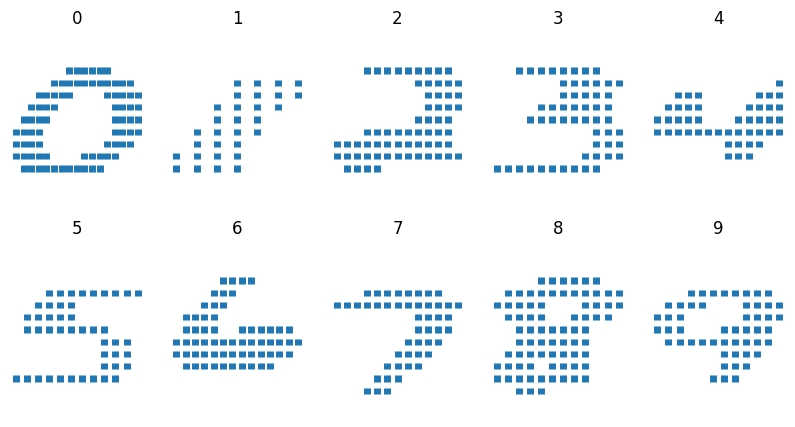

In [14]:
spike_set_reduced_read = []
for i in range(10):
    with open('Reduced Spikeset/MNIST_spikes' + str(i) + '.bin', 'rb') as f:
        spike_set_reduced_read.append(pickle.load(f))
    print(len(spike_set_reduced_read[i]))

figure = plt.figure(figsize=(10,5))
cols, rows = 5, 2
for i in range(1, cols * rows + 1):
    figure.add_subplot(rows, cols, i)
    plt.title(i-1)
    plt.axis("off")
    plt.gca().invert_yaxis()
    plt.eventplot(spike_set_reduced_read[i-1], linelengths=.5, linewidths=5)